#### 【課題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。
sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation
データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris_data_set = load_iris()
#print(iris_data_set.data)
#print(type(iris_data_set))

x = pd.DataFrame(iris_data_set.data, columns=iris_data_set.feature_names)    #Put explanatory variable into x as pandasdata frame
y = pd.DataFrame(iris_data_set.target, columns=['Species'])    #Put iris response variable into y as pandasdata frame

#### 【課題2】データの結合
そして、これらX,yを結合させたDataFrame型変数dfを作成してください。これ以降はこのdfを使っていきます。

In [2]:
#print(x)
#print(y)
df = pd.merge(x, y, left_index=True, right_index=True)
print(df)

df1 = pd.concat([x, y], axis=1)
print(df1)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8      

#### 【課題3】データの確認
今回扱うデータがどのようなものなのか改めて確認します。
少なくとも以下の4点についてコードとマークダウンを組み合わせてレポートしてください。
先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

###### 1.先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど)
###### 2.ラベルごとのサンプル数の合計を出力する。
1列目：サンプル数=150：萼の長さ[cm](数値データ float64)  
2列目：サンプル数=150：萼の幅[cm](数値データ float64)  
3列目：サンプル数=150：花弁の長さ[cm](数値データ float64)  
4列目：サンプル数=150：花弁の幅[cm](数値データ float64)  
5列目：サンプル数=150：アヤメの種類(数値データ int64)  

In [3]:
print("Data=\n{}\n".format(df[0:4]))
  
df.info()

Data=
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


###### 3.特徴量に欠損値があるかを確認する

In [4]:
"""
col_name = df.columns.values
for i in range(0, len(df.columns)):
    print("{}列目({}) データ欠損数={}".format(i, col_name[i], df[col_name[i]].isnull().sum()))
"""  
df.isnull().all()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
Species              False
dtype: bool

###### 4.特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### 【課題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

#### 【課題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。  
###### 1. sepal_widthの列を３つの異なる方法で抽出する  

In [6]:
COL = 1
col_name = df.columns.values
print("方法１ '列名で指定'\n{}".format(df[col_name[COL]]))

方法１ '列名で指定'
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), dtype: float64


In [7]:
print("方法2 '.locで指定'\n{}".format(df.loc[:, col_name[1]]))

方法2 '.locで指定'
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), dtype: float64


In [8]:
print("方法3 '.ilocで指定'\n{}".format(df.iloc[:,1]))

方法3 '.ilocで指定'
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), dtype: float64


###### 2. 50番目から99番目までのデータを抽出する  

In [9]:
print(df.iloc[50:100,:])

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   
55                5.7               2.8                4.5               1.3   
56                6.3               3.3                4.7               1.6   
57                4.9               2.4                3.3               1.0   
58                6.6               2.9                4.6               1.3   
59                5.2               2.7                3.9               1.4   
60                5.0               2.0                3.5               1.0   
61                5.9               3.0 

###### 3.petal_lengthの列の50番目から99番目までのデータを抽出する  

In [10]:
print(df.iloc[50:100,2])

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal length (cm), dtype: float64


###### 4.petal_widthの値が0.2のデータを抽出する  

In [11]:
print(df[(df.loc[:, col_name[3]]==0.2)])

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4                1.6               0.2   
14                5.8               4.0                1.2               0.2   
20                5.4               3.4                1.7               0.2   
22                4.6               3.6 

###### 5.locや.ilocを使うことになります。この２つはどう違うのかについても説明してください。

”.loc”はデータの行ラベル、列ラベルで指定するが、”.iloc”は行、列の番号で指定する。

#### 【課題6】図の作成
データは可視化して確認することが大切です。図を作成していきましょう。Matplotlibやseabornを使ってください。
###### 1.ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）  

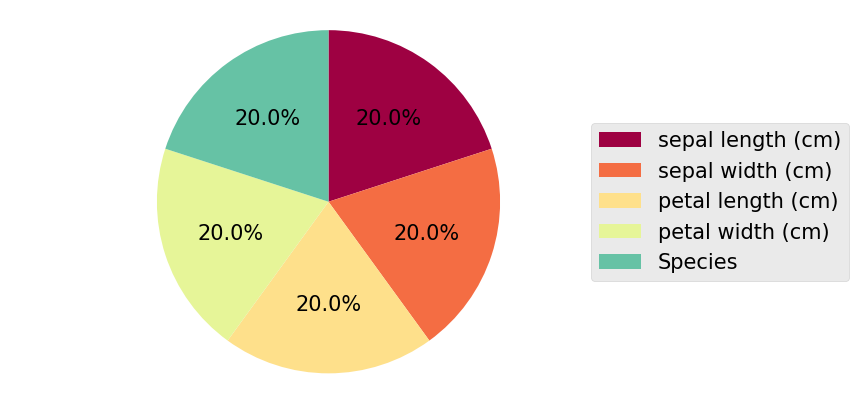

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

label = df.columns.values
data = [len(df[col_name[i]]) for i in range(0,len(df.columns))]

size=(9,5)
col=cm.Spectral(np.arange(len(data))/float(len(data)))

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=size, dpi=100)
plt.pie(data, colors=col, counterclock=False, startangle=90, autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0, right=0.7)
plt.legend(label, fancybox=True, loc='center left', bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('figure.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

###### 2.boxplotを使いデータの分布を可視化する  

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

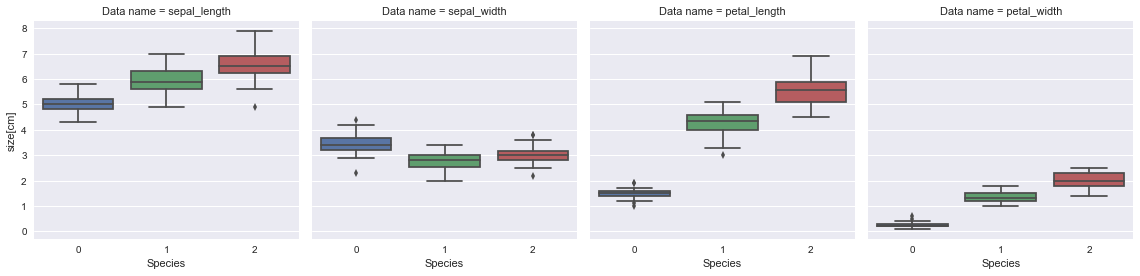

In [13]:
import seaborn as sb

"""
データの種類別に複数のグラフを表示させるために"size, species, data name"のrow=600, Col=3のデータフォーマットへ変換する
"""
#データの種類別にデータを抽出
pd_sepal_length = df[[col_name[0], col_name[4]]]
pd_sepal_width = df[[col_name[1], col_name[4]]]
pd_petal_length = df[[col_name[2], col_name[4]]]
pd_petal_width = df[[col_name[3], col_name[4]]]
#それぞれのデータに"Data name"列を追加&データ名をセット
pd_sepal_length['Data name'] = 'sepal_length'
pd_sepal_width['Data name'] = 'sepal_width'
pd_petal_length['Data name'] = 'petal_length'
pd_petal_width['Data name'] = 'petal_width'
#Colmun名前を"size[cm]"へ統一
pd_sepal_length = pd_sepal_length.rename(columns={col_name[0]: 'size[cm]'})
pd_sepal_width = pd_sepal_width.rename(columns={col_name[1]: 'size[cm]'})
pd_petal_length = pd_petal_length.rename(columns={col_name[2]: 'size[cm]'})
pd_petal_width = pd_petal_width.rename(columns={col_name[3]: 'size[cm]'})
#全てのデータを結合し新しいpandas data formatを作る
new_df = pd.concat([pd_sepal_length, pd_sepal_width, pd_petal_length, pd_petal_width]).reset_index(drop=True)
#print(new_df)

#sb.boxplot(x='Species', y='sepal length (cm)', data=df, hue='Data type')
sb.factorplot(x='Species', y='size[cm]', data=new_df, kind='box', col='Data name')

###### 3.violinplotを使いデータの分布を可視化する 

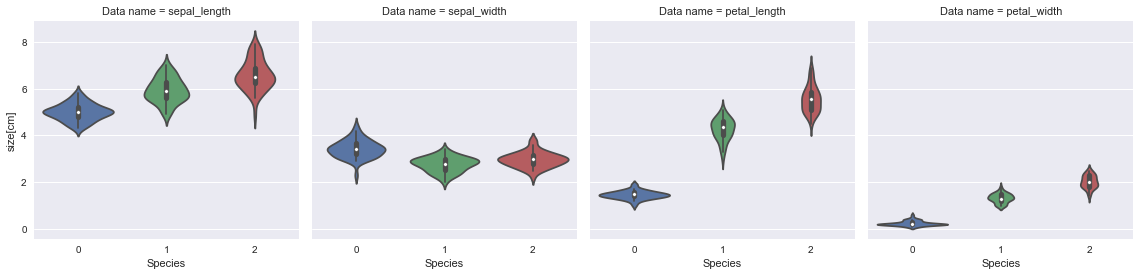

In [14]:
sb.factorplot(x='Species', y='size[cm]', data=new_df, kind='violin', col='Data name')
#sb.violinplot(x ='Species',  y='size[cm]', hue='Data type', data=new_df)

###### 4.boxplotとviolinplotは似た図を表示します。これらはどう違い、それぞれどのような利点があるのか説明してください。

Boxplotは中央値、四分位範囲、外れ値が分かりやすい。一方Violinplotはデータの詳細な分布を知ることができるため、例えば複数のピークを持つデータの場合に、ピークの位置など分布の様子を知ることができる。

#### 【課題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。
1.縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

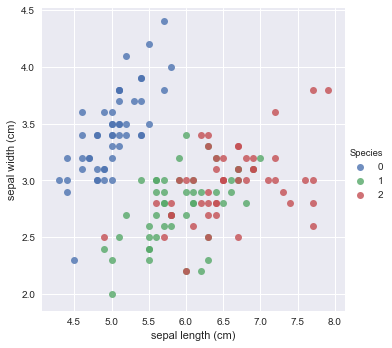

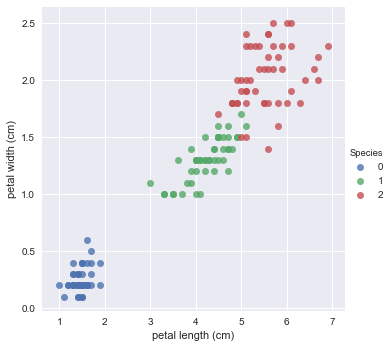

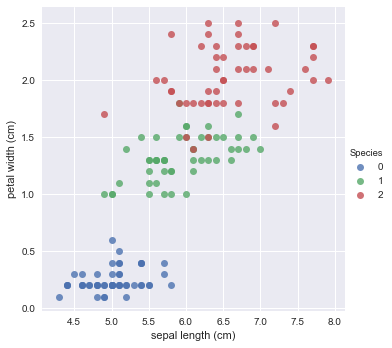

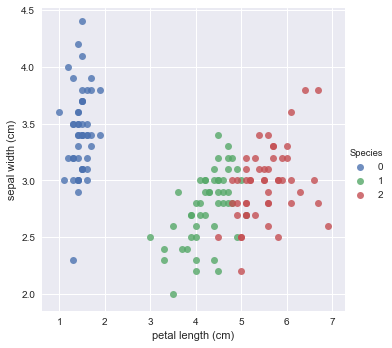

In [23]:
sb.lmplot('sepal length (cm)', 'sepal width (cm)', data=df, hue='Species', fit_reg=False )
sb.lmplot('petal length (cm)', 'petal width (cm)', data=df, hue='Species', fit_reg=False )
sb.lmplot('sepal length (cm)', 'petal width (cm)', data=df, hue='Species', fit_reg=False )
sb.lmplot('petal length (cm)', 'sepal width (cm)', data=df, hue='Species', fit_reg=False )

2.全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

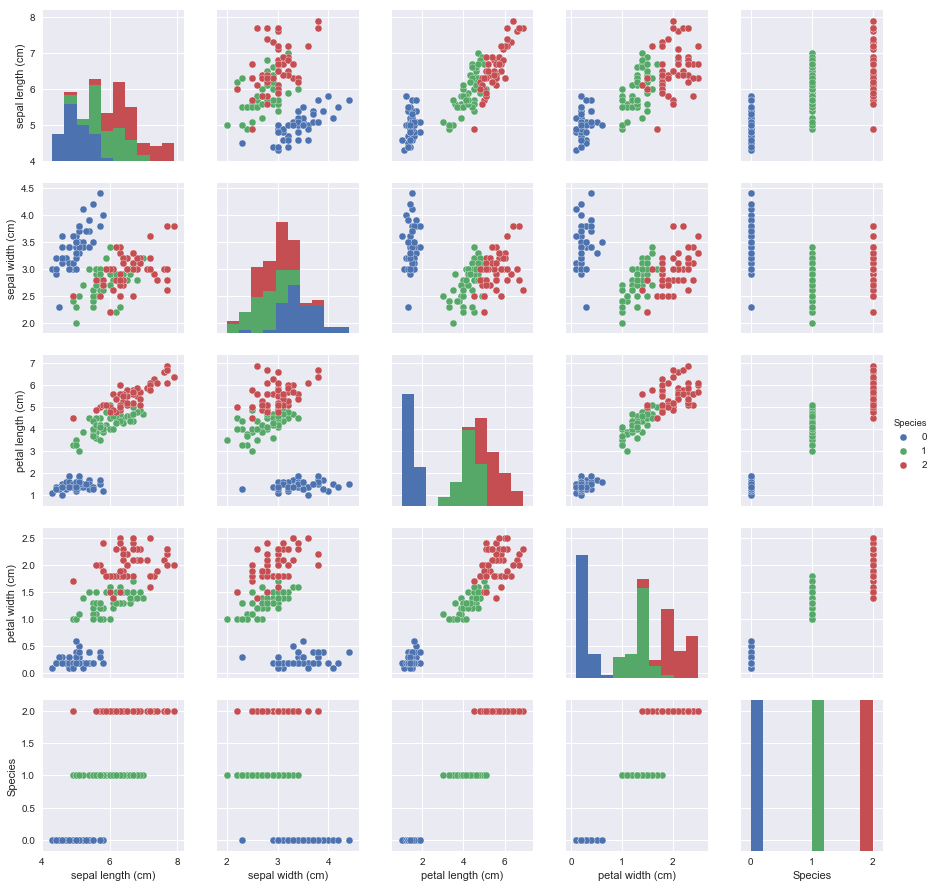

In [24]:
sb.pairplot(df, hue='Species')

3.４つの特徴量に関する相関係数行列を作る

In [61]:
list_iris_data= np.array([df[[col_name[i]]].values for i in range(4)])
#print(list_iris_data[3].reshape(-1,))
mat_correlation = np.corrcoef([list_iris_data[0].reshape(-1,) 
                              ,list_iris_data[1].reshape(-1,) 
                              ,list_iris_data[2].reshape(-1,) 
                              ,list_iris_data[3].reshape(-1,)])
print(mat_correlation)

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


4.相関係数行列のヒートマップを作る

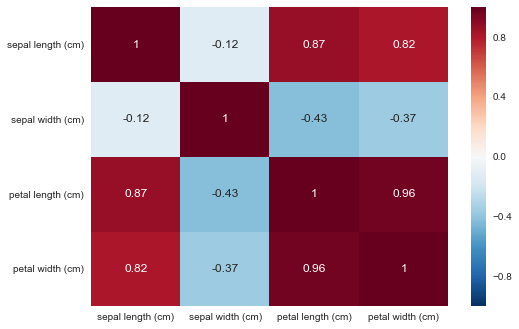

In [64]:
sb.heatmap(mat_correlation, annot=True,
                xticklabels=x.columns.values,
                yticklabels=x.columns.values)

#### 【課題8】簡単な考察
データを探索した時には、考察をすることが大切です。散布図行列を見ながら、3種類の花はどういう風に分けられそうかを簡単に考えて説明してください。

Petalの長さと幅に種類毎の特徴が表れており、以下のように分類できると考えられる。  
種類0:"Petalの長さ < 2.0cm" & "Petalの幅<0.8cm" の場合  
種類1:"3.0cm < Petalの長さ < 5.0cm" & "1.0cm < Petalの幅 < 1.8cm" の場合  
種類2: それ以外